In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Loading Data

In [3]:
(train_images, train_labels),(test_images,test_labels) = datasets.cifar100.load_data()

#Normalize pixel values b/w 0 and 1
train_images, test_images = train_images/255.0 , test_images/255.0

169009152/169001437 [==============================] - 4s 0us/step


CNN 

In [4]:
#creatiing a convolution base

model = models.Sequential()   # used to maintain the sequence of layers
model.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation= 'relu',))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation= 'relu',))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
Total params: 333,056
Trainable params: 333,056
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Flatten the output layer

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [8]:
# Compile the model
#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 3.7869 - accuracy: 0.1208 - val_loss: 3.2146 - val_accuracy: 0.2189
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.9894 - accuracy: 0.2625 - val_loss: 2.8039 - val_accuracy: 0.3030
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.6079 - accuracy: 0.3359 - val_loss: 2.6450 - val_accuracy: 0.3370
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3372 - accuracy: 0.3927 - val_loss: 2.5414 - val_accuracy: 0.3602
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1335 - accuracy: 0.4354 - val_loss: 2.4496 - val_accuracy: 0.3848
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9454 - accuracy: 0.4782 - val_loss: 2.4875 - val_accuracy: 0.3856
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7690 - accuracy: 0.5193 - val_loss: 2.5062 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 2.7650 - accuracy: 0.3826


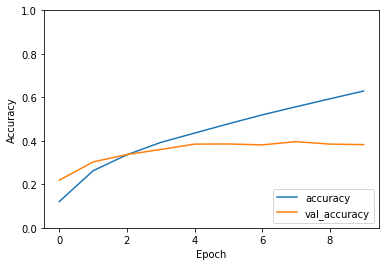

In [10]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')

test_loss , test_acc = model.evaluate(test_images,test_labels)

In [11]:
print(test_acc)

0.38260000944137573


FEED FORWARD

In [21]:
model = models.Sequential()
model.add(layers.Flatten(input_shape = (32,32,3)))
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(100, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 100)              

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 100, validation_data=(test_images,test_labels))

Epoch 1/100
1563/1563 [==============================] - 7s 5ms/step - loss: 3.1938 - accuracy: 0.2174 - val_loss: 3.4294 - val_accuracy: 0.1922
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 3.1591 - accuracy: 0.2216 - val_loss: 3.4281 - val_accuracy: 0.1931
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 3.1282 - accuracy: 0.2271 - val_loss: 3.4056 - val_accuracy: 0.1943
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 3.0919 - accuracy: 0.2338 - val_loss: 3.4438 - val_accuracy: 0.1949
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 3.0585 - accuracy: 0.2408 - val_loss: 3.3950 - val_accuracy: 0.2019
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 3.0260 - accuracy: 0.2455 - val_loss: 3.4194 - val_accuracy: 0.2015
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 2.9963 - accuracy: 0.2495 - val_loss: 3.3982 - val_ac

313/313 [==============================] - 1s 2ms/step - loss: 6.2107 - accuracy: 0.1744


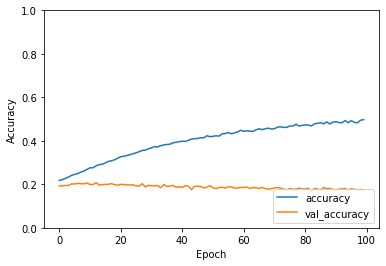

In [26]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')

test_loss , test_acc = model.evaluate(test_images,test_labels)